![Diabetes](https://www.diabetes.co.uk/wp-content/uploads/2019/01/How-to-Bring-Down-High-Blood-Sugar-Levels-1.png)

Hello Kagglers, <br>
    In this notebook I tried to create an optimal model for Diabetes Prediction from given .csv data.<br>
    Points covered are:<br>
     0] Exploratory Data Analysis and Visualization<br>
     1] Data Normalized Distribution<br>
     2] Data Up-Sampling  for Imbalance data<br>
     3] Feature Engineering and Selection<br>
     4] Fine tuning of Models.<br>
 <br>
 If you found this notebook helpful, your *Upvote Will Encourage Me* !!! 😀😇😊
 
 ## Problem Statement : Diabetes Prediction
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [2]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Overlooking whole data in a single window.

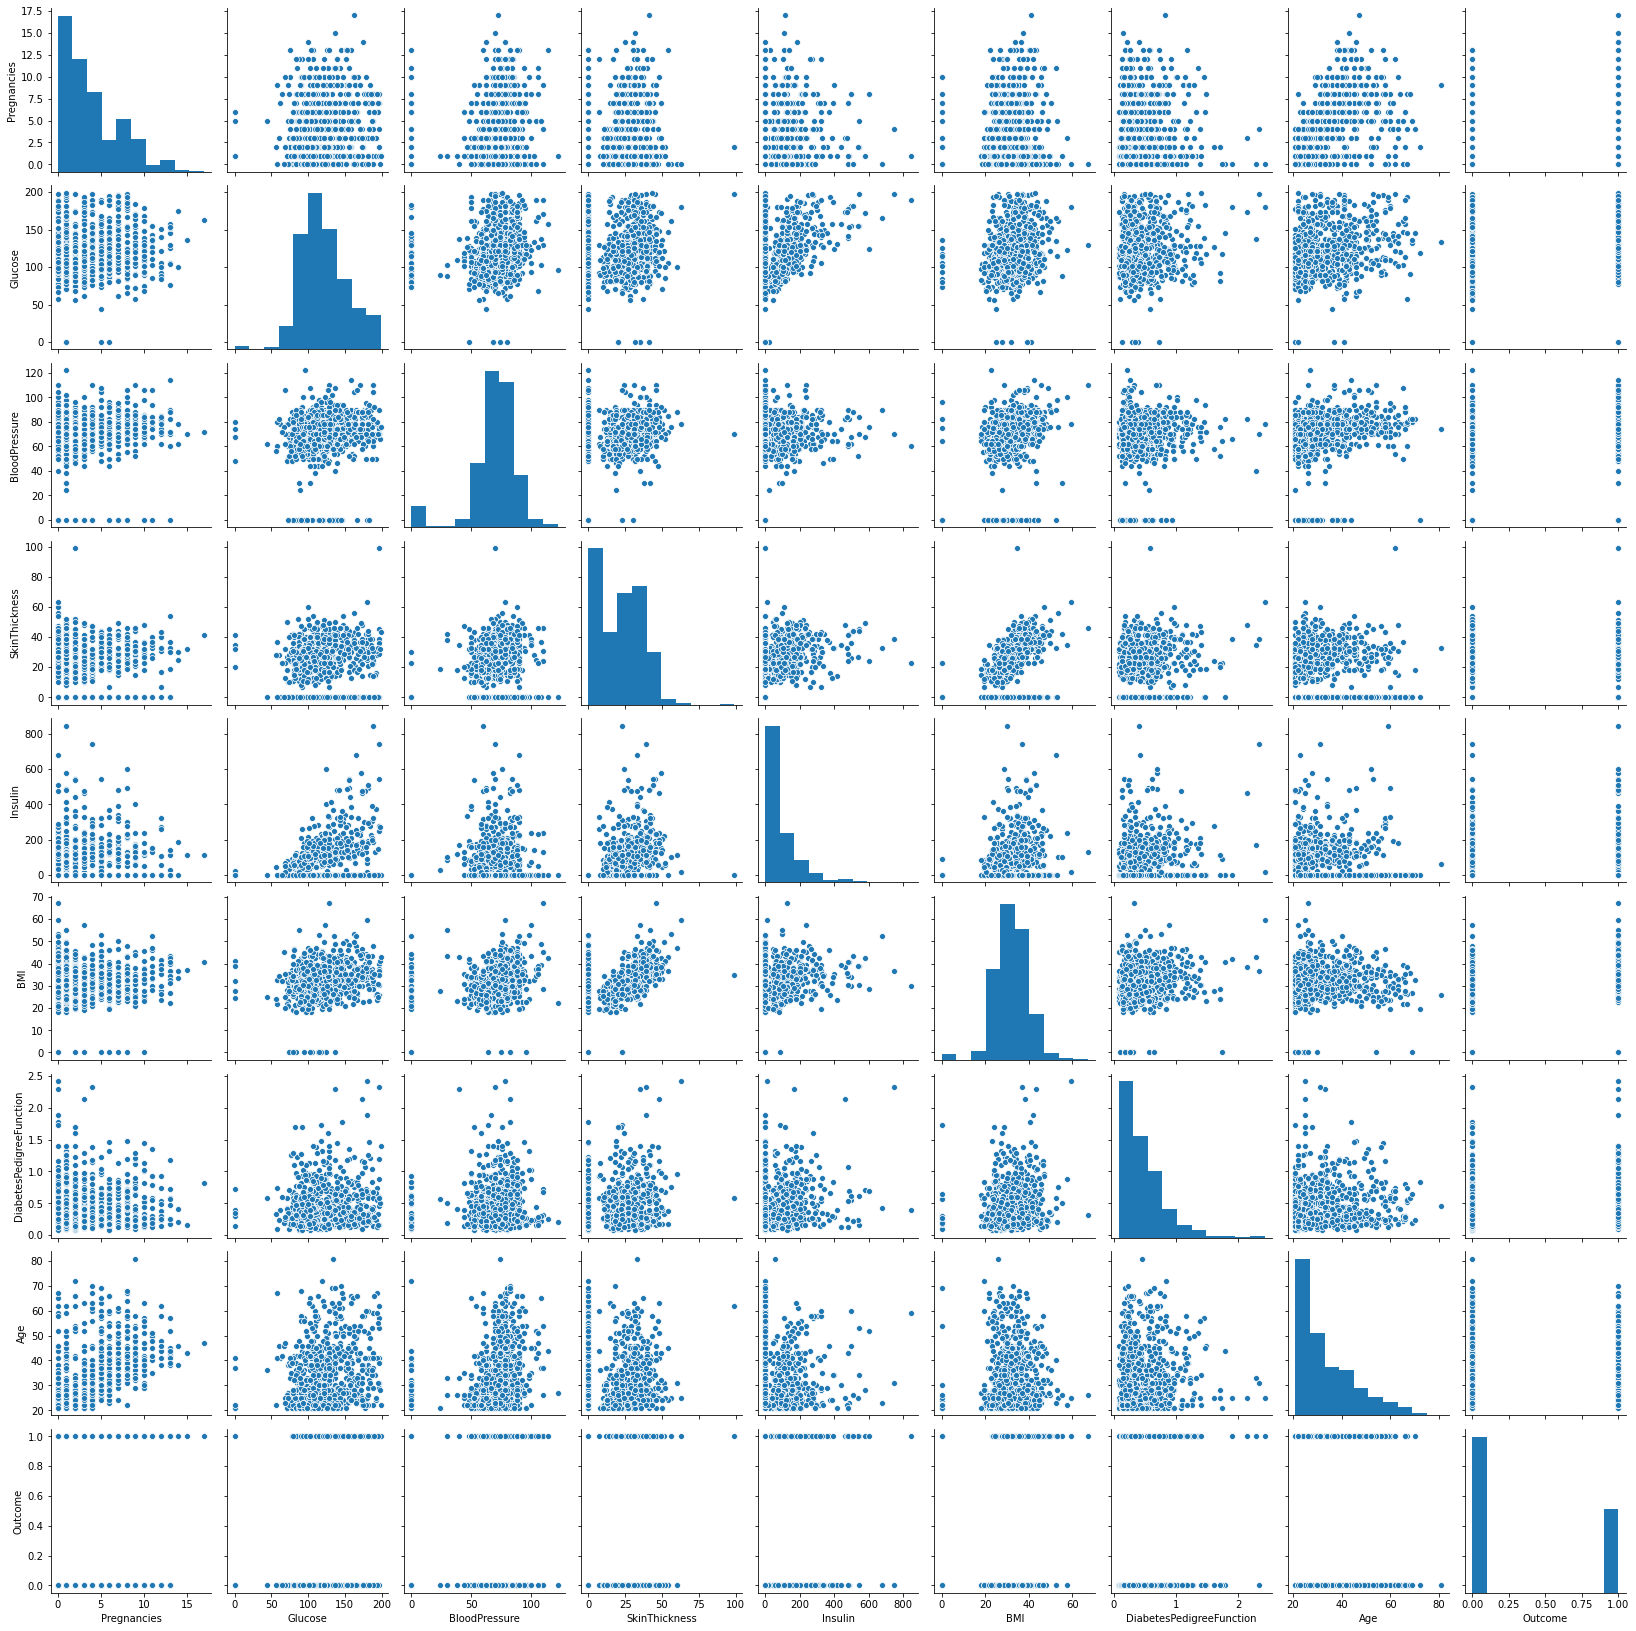

In [3]:
sns.pairplot(data)

Looks major of the attributes contain Non-Normally Distributed data points.
Also Data is seriously imbalance.

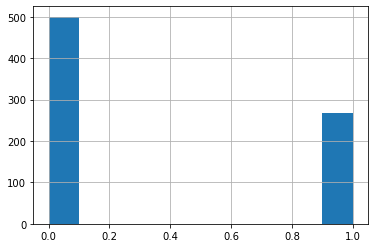

In [4]:
data["Outcome"].hist()

*Checking for null values distribution...*

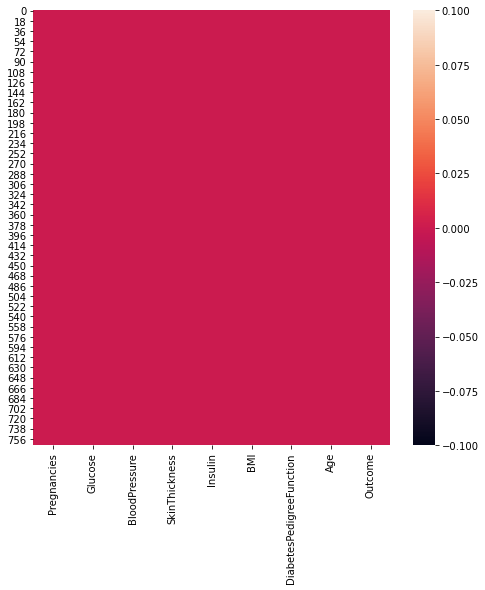

In [5]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*Checking for feature importance of attributes...
By feeding data to Classifier
*

In [7]:

X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]

Pregnancies -> 0.10621197
Glucose -> 0.2424023
BloodPressure -> 0.08803366
SkinThickness -> 0.07818192
Insulin -> 0.10381887
BMI -> 0.1486732
DiabetesPedigreeFunction -> 0.10059207
Age -> 0.13208601


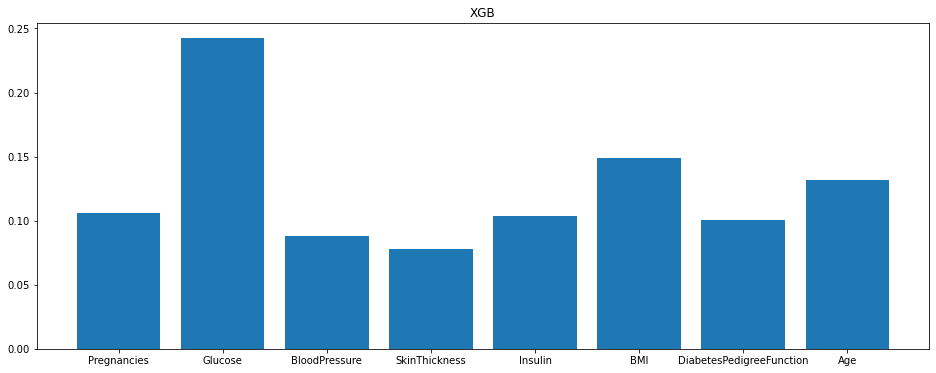

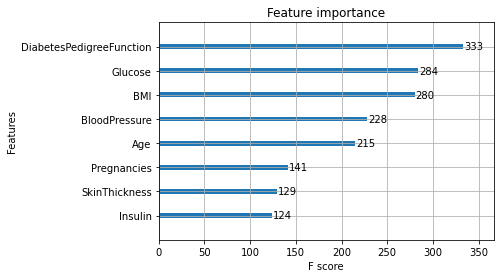

In [8]:
XGBR = XGBClassifier()
XGBR.fit(X,Y)
features = XGBR.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
    print(Columns[i],"->",j)

plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()

plot_importance(XGBR)

From above graph we can say Skin "Thickness" is least important attribute.

Where "Glucose", "DiabetesPedigreeFunction","BMI" are oe of the most attributes.

Lets benchmark dataset i.e. train Classifier without any explicit featue engineering or modification in data.


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.66      0.60      0.63        52

    accuracy                           0.76       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154

0.7597402597402597


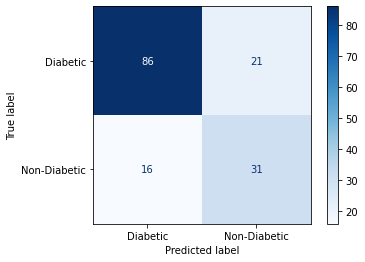

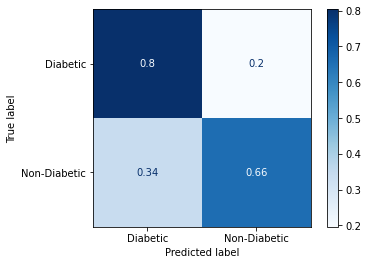

In [9]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

To performance lets adjust distribution of these attributes->

"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

Taking log value of data-points of these features will distribute them normally.

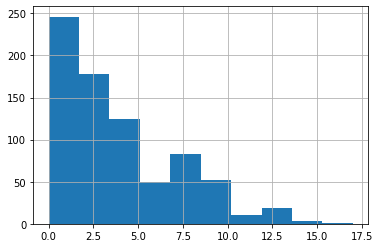

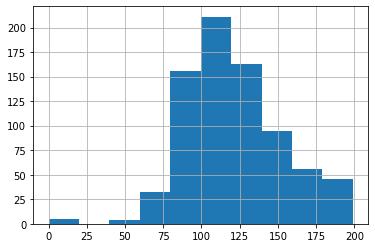

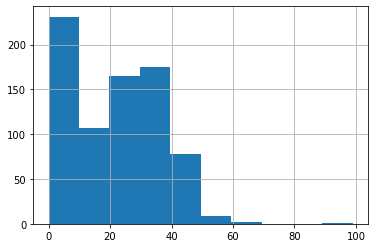

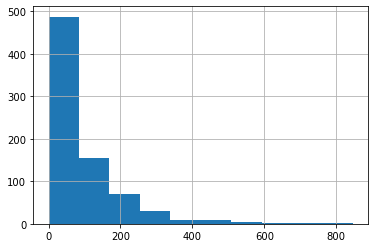

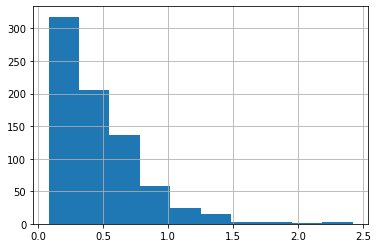

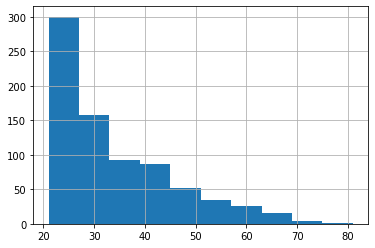

After normal distibution operation



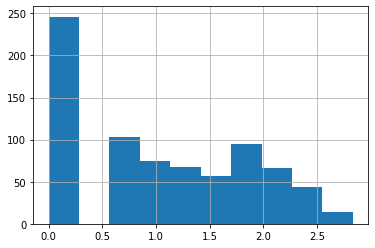

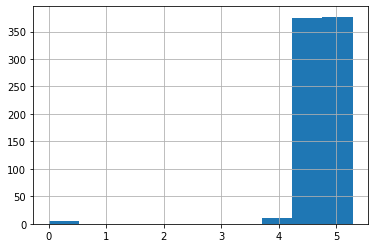

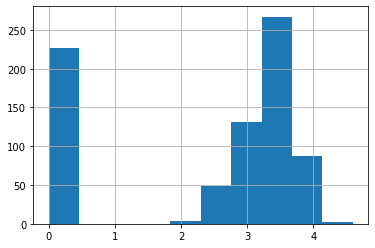

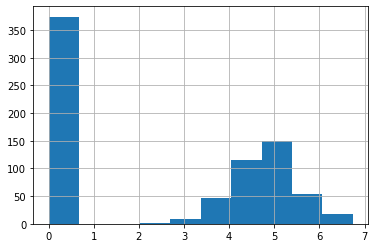

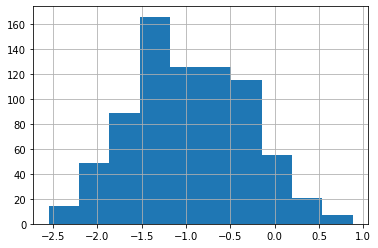

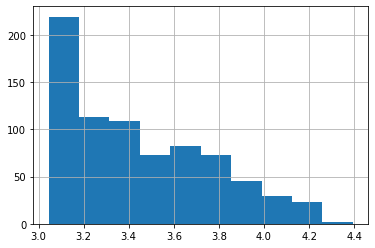

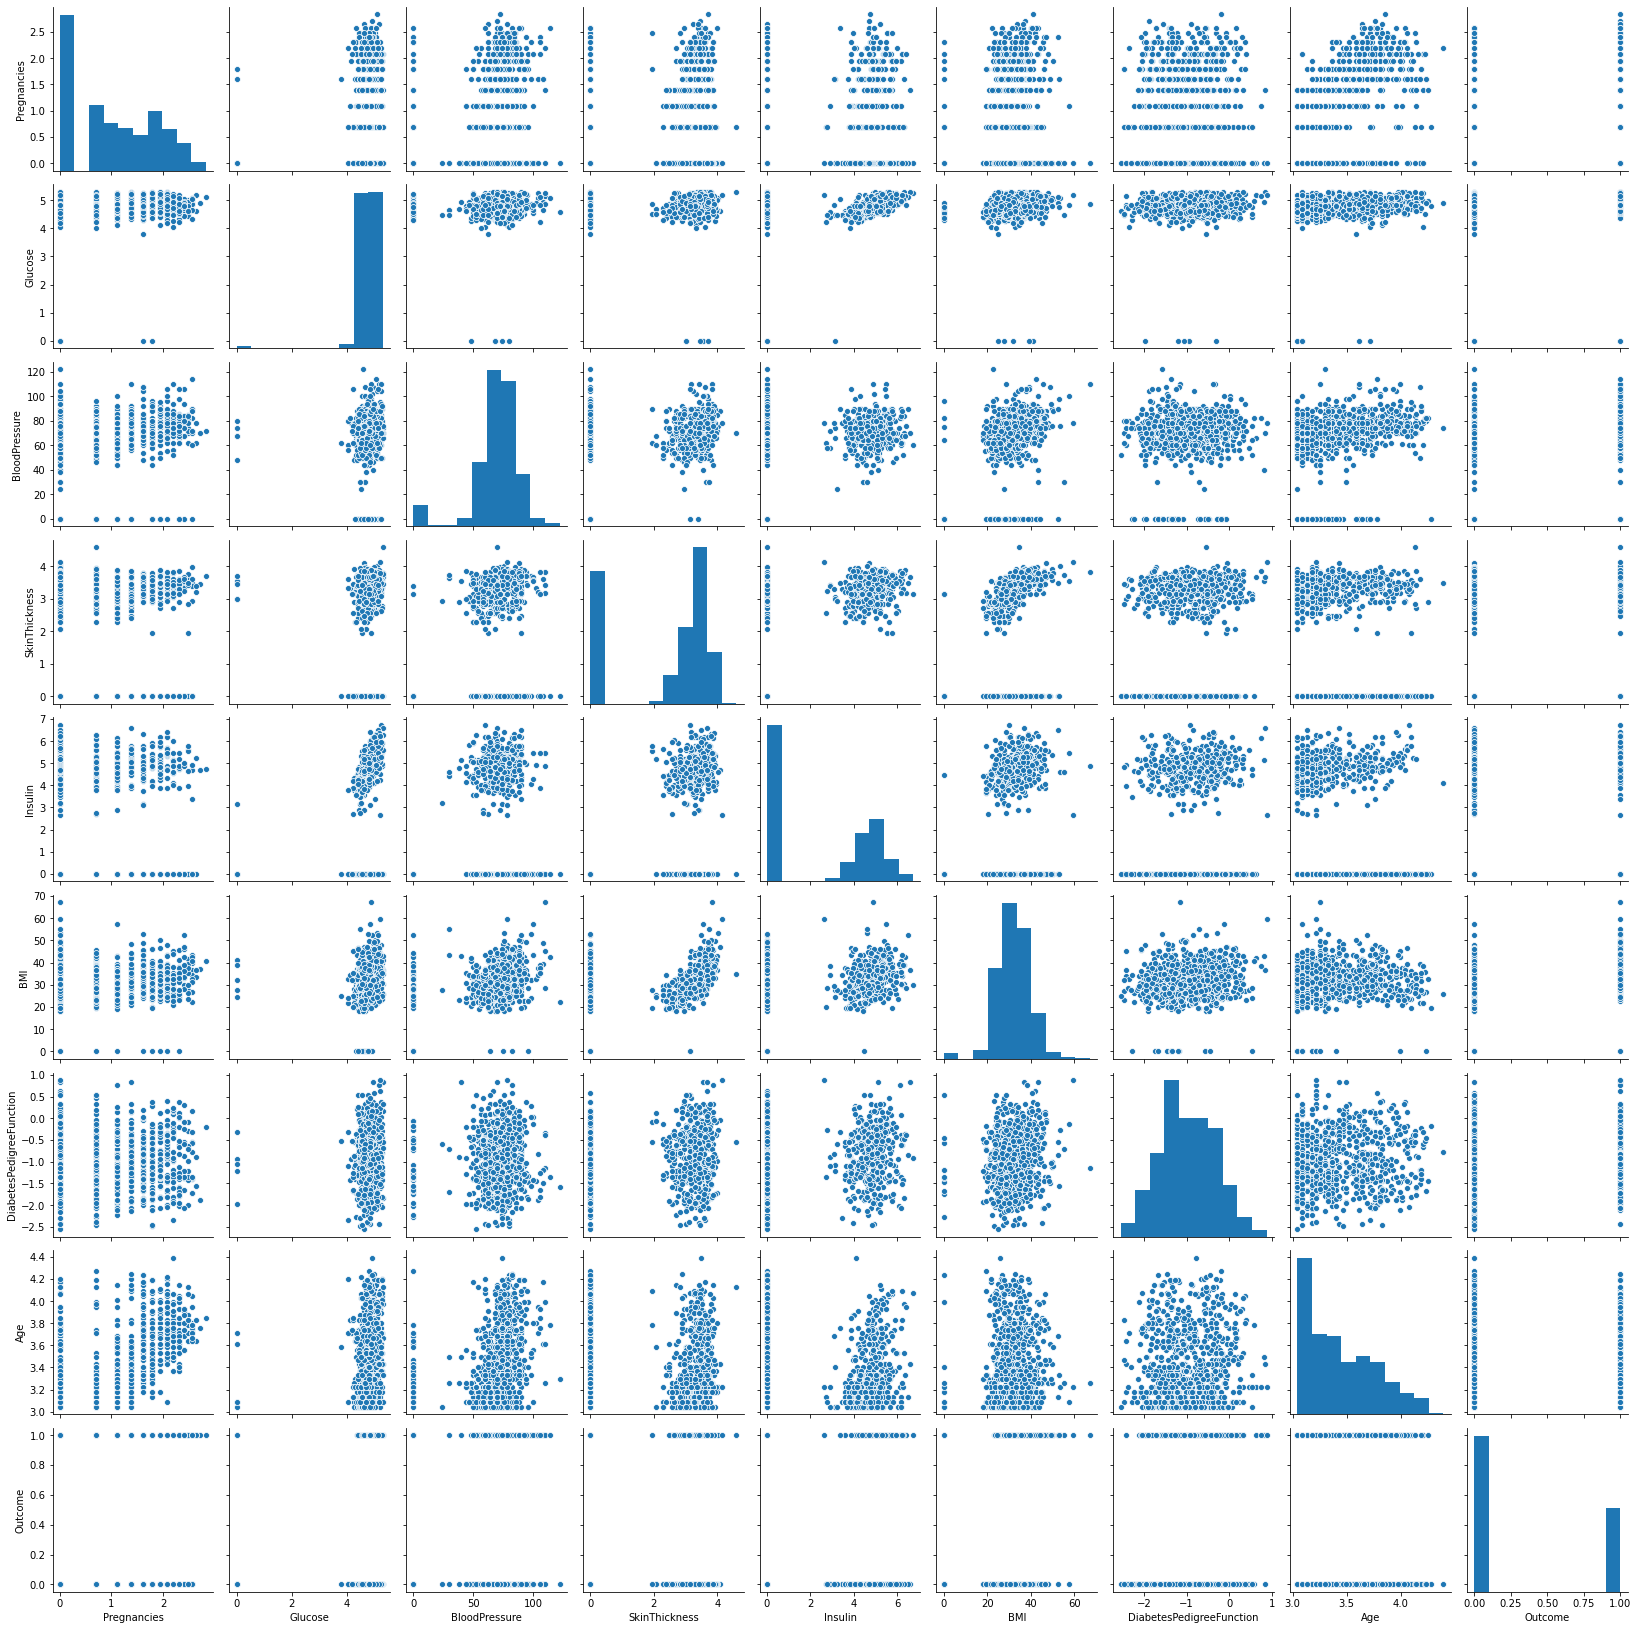

In [10]:
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"
data_new = data.copy()

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()


data_new["Pregnancies"] = [np.log(i) if i!=0 else 0 for i in data_new["Pregnancies"]]
data_new["Glucose"] = [np.log(i) if i!=0 else 0 for i in data_new["Glucose"]]
data_new["SkinThickness"] = [np.log(i) if i!=0 else 0 for i in data_new["SkinThickness"]]
data_new["Insulin"] = [np.log(i) if i!=0 else 0 for i in data_new["Insulin"]]
data_new["DiabetesPedigreeFunction"] = [np.log(i) if i!=0 else 0 for i in data_new["DiabetesPedigreeFunction"]]
data_new["Age"] = [np.log(i) if i!=0 else 0 for i in data_new["Age"]]

print("="*10,"\nAfter normal distibution operation\n")

data_new["Pregnancies"].hist()
plt.show()
data_new["Glucose"].hist()
plt.show()
data_new["SkinThickness"].hist()
plt.show()
data_new["Insulin"].hist()
plt.show()
data_new["DiabetesPedigreeFunction"].hist()
plt.show()
data_new["Age"].hist()
plt.show()

sns.pairplot(data_new)

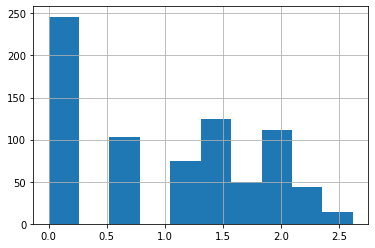

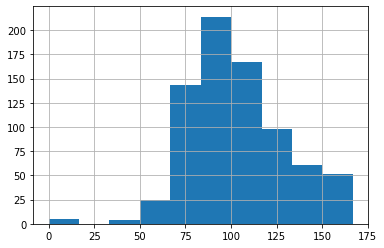

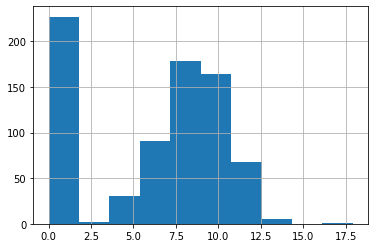

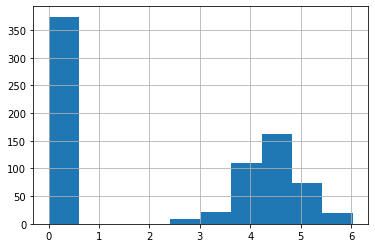

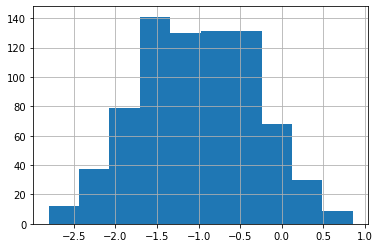

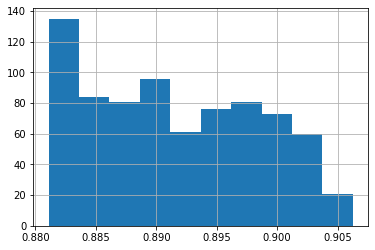

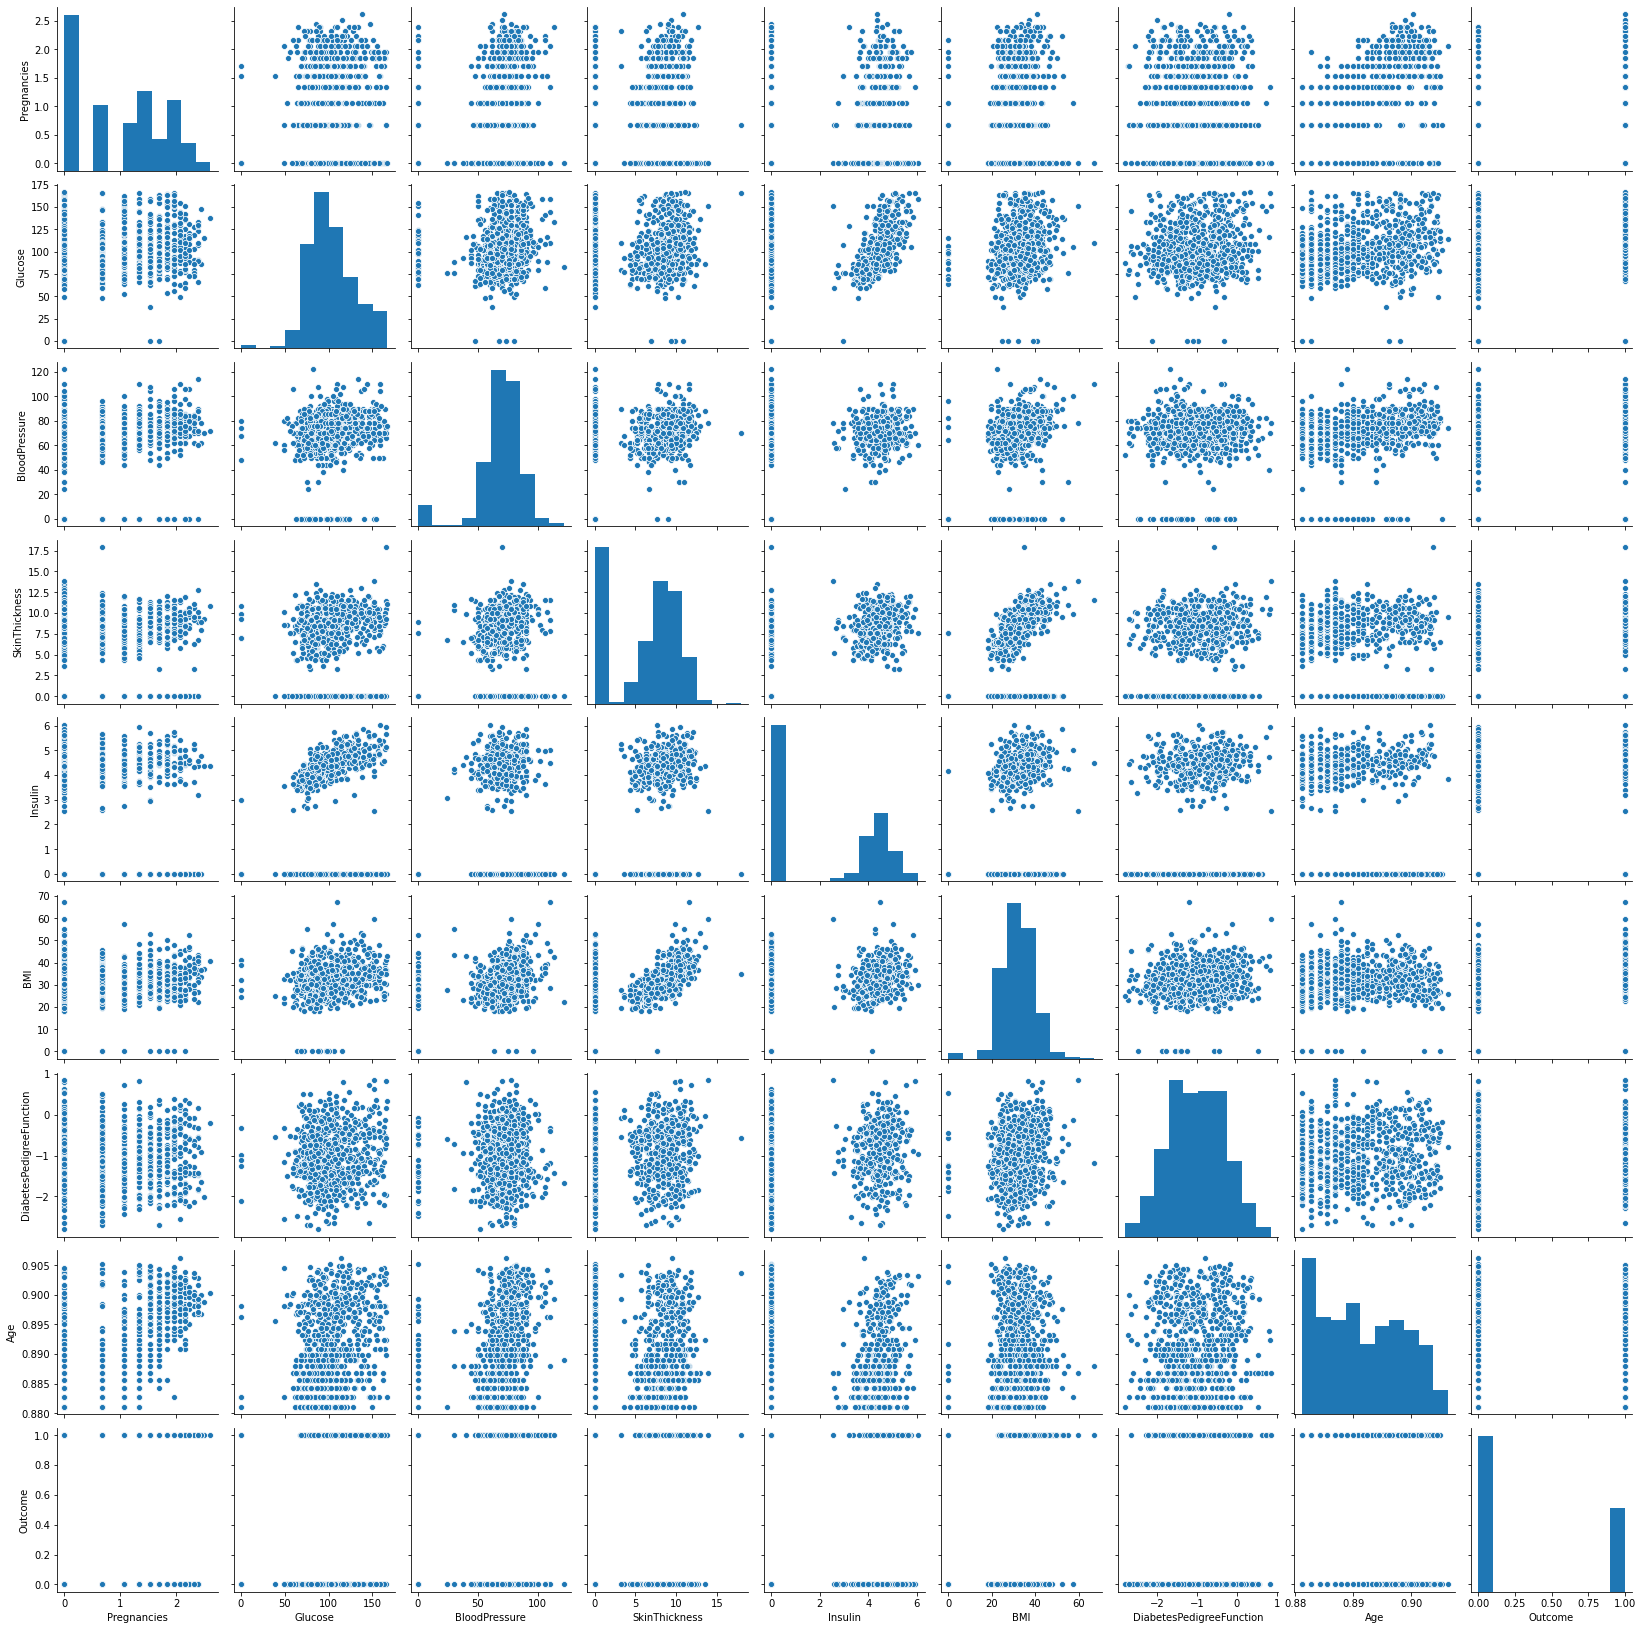

In [11]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
#"Pregnancies","Glucose","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"

data_boxcox = data.copy()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Pregnancies"].values]
data_boxcox["Pregnancies"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Pregnancies"],fitted_lambda)
data_boxcox["Pregnancies"].hist()
plt.show()


to_convert = [i if i!=0 else 1 for i in data_boxcox["Glucose"].values]
data_boxcox["Glucose"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Glucose"],fitted_lambda)
data_boxcox["Glucose"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["SkinThickness"].values]
data_boxcox["SkinThickness"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["SkinThickness"],fitted_lambda)
data_boxcox["SkinThickness"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Insulin"].values]
data_boxcox["Insulin"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Insulin"],fitted_lambda)
data_boxcox["Insulin"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["DiabetesPedigreeFunction"].values]
data_boxcox["DiabetesPedigreeFunction"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["DiabetesPedigreeFunction"],fitted_lambda)
data_boxcox["DiabetesPedigreeFunction"].hist()
plt.show()

to_convert = [i if i!=0 else 1 for i in data_boxcox["Age"].values]
data_boxcox["Age"],fitted_lambda= boxcox(to_convert,lmbda=None)
inv_boxcox(data_boxcox["Age"],fitted_lambda)
data_boxcox["Age"].hist()
plt.show()

sns.pairplot(data_boxcox)

In [12]:
print(data_new.describe())
print(data_boxcox.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      1.039014    4.739263      69.105469       2.326569    2.466624   
std       0.855078    0.457964      19.355807       1.542979    2.456257   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.000000    4.595120      62.000000       0.000000    0.000000   
50%       1.098612    4.762174      72.000000       3.135494    3.416516   
75%       1.791759    4.943422      80.000000       3.465736    4.846148   
max       2.833213    5.293305     122.000000       4.595120    6.740519   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                 -0.959940    3.448802    0.348958  
std      7.884160                  0.644322    0.322702    0.476951  
min      0.000000                 -

# Term Normally Distributed data referes to <br>
1] Satndard Deviation of data = 1 and Mean of data = 0. <br>
2] Graph plot of data gives Bell Curve<br>

![Bell Curve](https://i.pinimg.com/originals/dd/5e/f9/dd5ef94c82281d75ff0bce252c6be136.jpg)
<br>
<br>
Intuition behind the the Nromal Data Distribution in simple langugae is Most of the data is<br>
at near Mean of the whole data. <br>

68% data points relie between -1 and 1<br>
95% data points reliw between -2 and 2<br>

Standard deviation ensures that all the data points are grouped together and having specific range.<br>
Infact Stadard deviation = 1 removes outliers from data. Outliers are the points which not fit <br>
in the normal range of points. It is simply away from the mean.<br>


From above graphs after logarithm value method and BoxCox method both are removing outliers from data.<br>
Graph shows data after BoxCox method data is normally distributed. <br>
Where mathematical values are showing log value has removed outliers <br>

We will try both methods.

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

0.8051948051948052


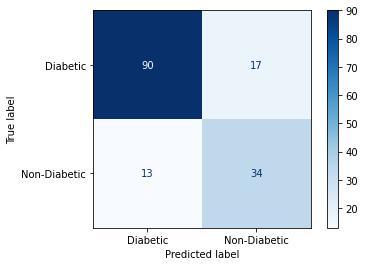

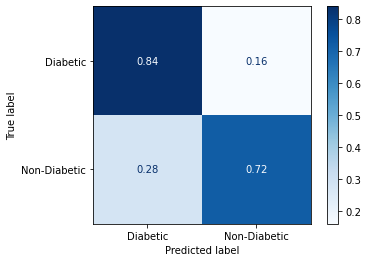

In [13]:
X = data_boxcox.drop(["Outcome"],axis=1)
Y = data_boxcox["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

# Understanding Classification report
![Metrics](https://static.packt-cdn.com/products/9781785282287/graphics/B04223_10_02.jpg)
![Accuracy](https://miro.medium.com/max/1594/0*qLxAWTs-gZjQvTi4.jpg)
![Precision](https://miro.medium.com/max/1104/1*5PvyyMvH5n42XICQrlXOzw.png)
![Recall](https://lawtomated.com/wp-content/uploads/2019/10/Recall_1.png)
![F1 Score](https://datascience103579984.files.wordpress.com/2019/04/capture3-24.png)



              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.72      0.67      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154

0.8051948051948052


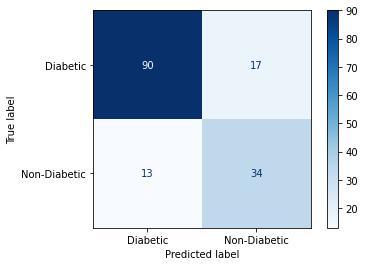

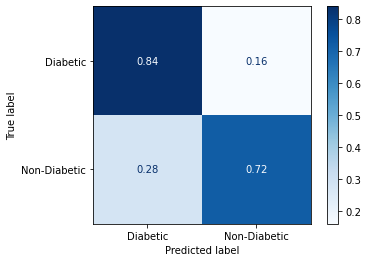

In [14]:
X = data_new.drop(["Outcome"],axis=1)
Y = data_new["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy increased significantly!!!.😀 <br>
One more noticable thing is improvement in performance of model for second class. <br>
Look at Precision, Recall and F1 Score is increased for first class but also for second class. <br>

Now lets tackle second problem which is Imabalance Data.


Count of Negative class:  500
Count of Positive class:  268


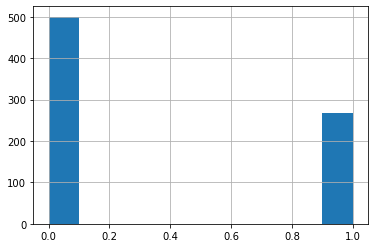

In [15]:
print("Count of Negative class: ",list(data["Outcome"]).count(0))
print("Count of Positive class: ",list(data["Outcome"]).count(1))
data["Outcome"].hist()


Data is highly biased towards Negative outcome i.e "0" than positive "1".<br>
Out of 768 records 500 records holds Negative outcome. Where only 268 records holds positive outcome. <br>

*To overcome this problem we can Up-Sample or Down-Sample data points according to Minority and Majority.*

In [16]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.Outcome==0]
df_minority = data_bal[data_bal.Outcome==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=268,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Outcome.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=500,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Outcome.value_counts())

Downsampled data:->
 1    268
0    268
Name: Outcome, dtype: int64
Upsampled data:->
 1    500
0    500
Name: Outcome, dtype: int64


              precision    recall  f1-score   support

           0       0.71      0.65      0.68        57
           1       0.64      0.71      0.67        51

    accuracy                           0.68       108
   macro avg       0.68      0.68      0.68       108
weighted avg       0.68      0.68      0.68       108

0.6759259259259259


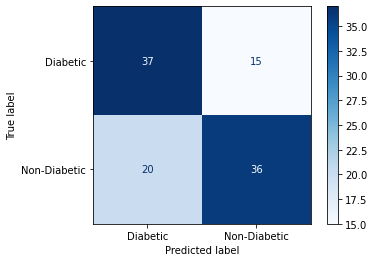

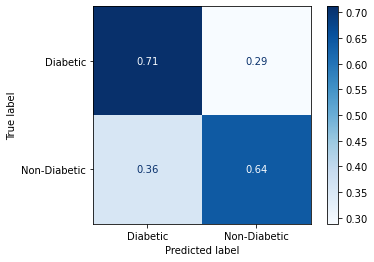

In [17]:
X = df_downsampled.drop(["Outcome"],axis=1)
Y = df_downsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        84
           1       0.94      0.83      0.88       116

    accuracy                           0.87       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.87      0.87       200

0.87


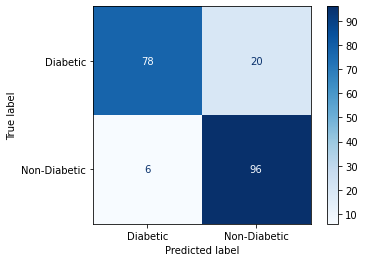

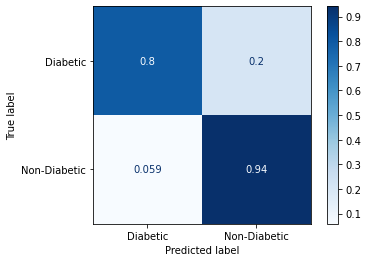

In [18]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

Accuracy and other metrics too says it all. <br>
Up-Sampling is helpfull in our case to make data balanced. <br>
Now to create an optimal model Fine-Tuning of model Classifer is needed.

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        86
           1       0.94      0.84      0.89       114

    accuracy                           0.88       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.88      0.88       200

0.88


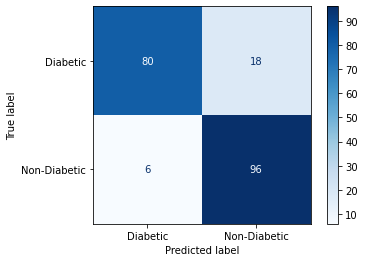

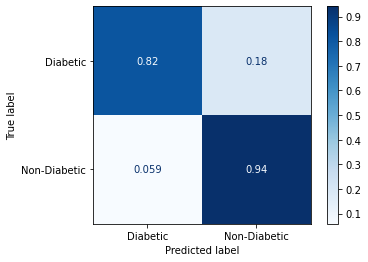

In [19]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(XGBR,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.93      0.84      0.88       103

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

0.885


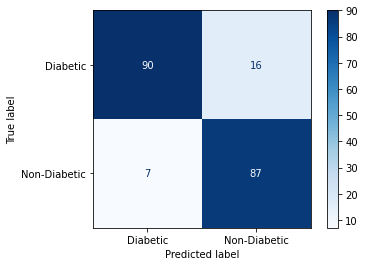

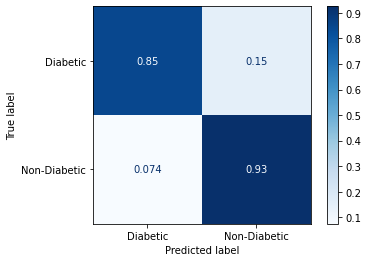

In [20]:
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

#RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')



1.5 % addition is also a good step.<br>
# Peak points till now:-> <br>
Benchmark : 75.97 <br>
XGB : 87.50 <br>
RF : 88.50

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        98
           1       0.83      0.76      0.80       102

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200

0.8


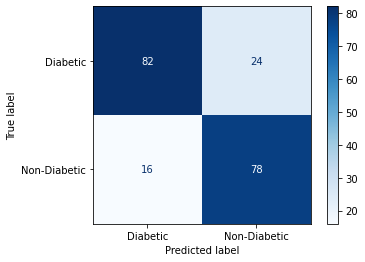

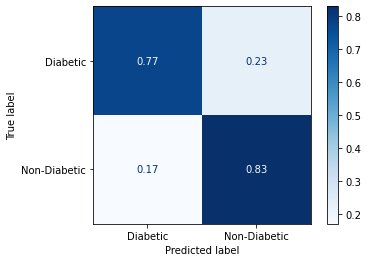

In [21]:
#Lets scale the data
StSc = StandardScaler()
MnMx = MinMaxScaler()

X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

X_train , X_test = MnMx.fit_transform(X_train) , MnMx.fit_transform(X_test)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')



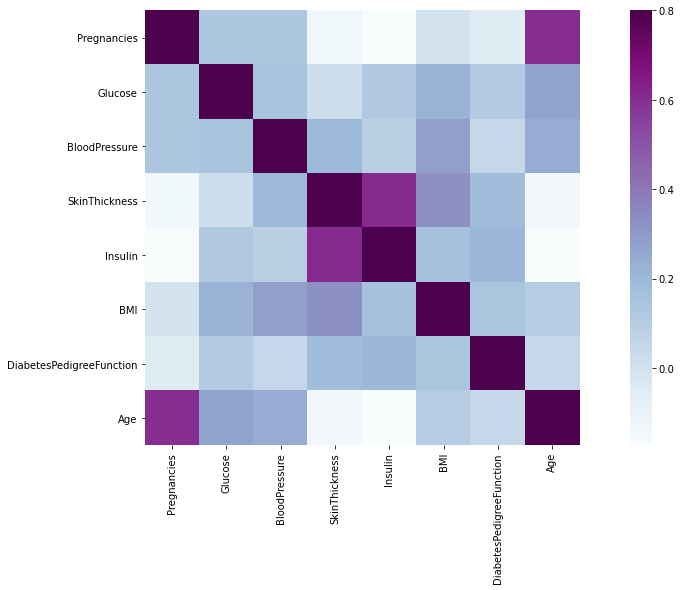

In [22]:
#Heat map of dataset with relative importance
matrix = data_boxcox.drop(["Outcome"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

Lets make action of Feature-Engineering. <br>
Remember attributes "Pregnancies" , "SkinThickness" , "Insulin" are having less imporance so lets send them for rest.

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        96
           1       0.94      0.85      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

0.89


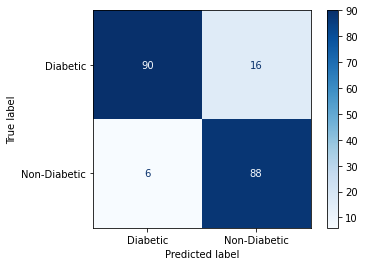

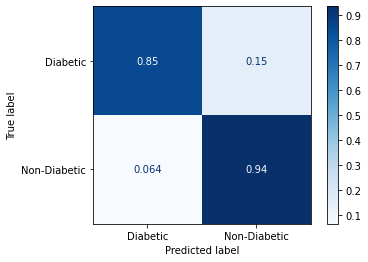

In [23]:
#X = df_upsampled.drop(["Outcome" , "Pregnancies" , "SkinThickness" ,"Insulin"],axis=1) # 0.89
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)

RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
#RF = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues)
plot_confusion_matrix(RF,X_test,y_test,display_labels=["Diabetic","Non-Diabetic"],cmap=plt.cm.Blues,normalize='true')


In [24]:
X = df_upsampled.drop(["Outcome" ,"BloodPressure", "Pregnancies"  ,"SkinThickness" ,"Insulin"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))


RF = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       0.83      0.94      0.88        94
           1       0.94      0.83      0.88       106

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

Voting Ensemble:> 0.88
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       112
           1       0.70      0.75      0.73        88

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

SVM:> 0.75
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        96
           1       0.94      0.85      0.89       104

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.69      0.82      0.75        89
           1       0.83      0.70      0.76       111

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.76      0.76       200

DecisionTreeClassifier:> 0.755
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.81      0.80      0.80        95

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

AdaBoostClassifier:> 0.815
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       102
           1       0.76      0.72      0.74        98

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg    

# Magical Outliers Removing Technique 🚀
<br>
In this method outliers will be removed from original data and will directly fitted in model without any<br>
explicit feature engineering or sampling.

In [25]:

data_ = data.copy()
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==0), 'SkinThickness']=int(data_[(data_.Outcome==0)]['SkinThickness'].mean())
data_.loc[(data_.SkinThickness<5)& (data_.Outcome==1), 'SkinThickness']=int(data_[(data_.Outcome==1)]['SkinThickness'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==0), 'Insulin']=int(data_[(data_.Outcome==0)]['Insulin'].mean())
data_.loc[(data_.Insulin==0)& (data_.Outcome==1), 'Insulin']=int(data_[(data_.Outcome==1)]['Insulin'].mean())

In [26]:
X = np.array(data_[["Pregnancies","BloodPressure","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
Y = np.array(data_.Outcome)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 presort=False, random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))



              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.87      0.84      0.85        49

    accuracy                           0.91       154
   macro avg       0.90      0.89      0.89       154
weighted avg       0.91      0.91      0.91       154

Voting Ensemble:> 0.9090909090909091
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

SVM:> 0.7597402597402597
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       100
           1       0.89      0.78      0.83        54

    accuracy                           0.89       154
   macro avg       0.89      0.86      0.87       154
weighted avg

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


# Results 💹📈
<br>
Benchmark : 75.97 <---> *Without any processing* <br>
XGBoost : 87.50 <---> *After Distribution Normalization + Up-Sampling + Feature Selection* <br>
XGBoost & Random Forest : 89.00 <---> *After Distribution Normalization + Up-Sampling + Feature Selection + Fine Tuning + Random State in Data Spliting*<br>
Gradient Boosting Classifier : 92.20 <---> *After removing outliers*

In [27]:
np.mean(list(data.SkinThickness))

20.536458333333332

Visit for outlier removal techniques<br> 
https://www.kaggle.com/akhileshdkapse/starter-guide-eda-acc-87-precision-92/notebook#Removing-outliers-! <br>
And <br>
https://www.kaggle.com/abdulrahmanahajj/diabetes-acc-92-auc-0-914 